Building prefix dict from C:\Users\user\Python\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u652b94a3a1dd8db4a21d98b87f012eeb.cache


標題：數位人文學- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 數位人文學
網址：/url?q=https://zh.wikipedia.org/zh-tw/%25E6%2595%25B8%25E4%25BD%258D%25E4%25BA%25BA%25E6%2596%2587%25E5%25AD%25B8&sa=U&ved=2ahUKEwi3jfuytcPlAhV2yosBHcBoAp8QFnoECAsQAg&usg=AOvVaw3VecgKK5nuLbbWtmLiKkVa
標題：TCDH 數位人文創新人才培育計畫Talent Cultivation Project for ...www.dhcreate.nccu.edu.tw
網址：/url?q=http://www.dhcreate.nccu.edu.tw/&sa=U&ved=2ahUKEwi3jfuytcPlAhV2yosBHcBoAp8QFjACegQICBAB&usg=AOvVaw3XBiNT2Ek2AtgdVhCj1g7D
標題：[PDF] 導論——什麼是數位人文 - 台灣歷史數位圖書館 - 國立臺灣大學thdl.ntu.edu.tw › thdl_pdf › book1
網址：/url?q=http://thdl.ntu.edu.tw/thdl_pdf/book1.pdf&sa=U&ved=2ahUKEwi3jfuytcPlAhV2yosBHcBoAp8QFjADegQIBhAB&usg=AOvVaw2Ee0KP8c_xLBp2yUTbFdqO
標題：第九屆數位典藏與數位人文國際研討會: DADH 2018dadh2018.dila.edu.tw
網址：/url?q=http://dadh2018.dila.edu.tw/&sa=U&ved=2ahUKEwi3jfuytcPlAhV2yosBHcBoAp8QFjAEegQICRAB&usg=AOvVaw0CFEP-BOGiJaNReNQ5FGaU
標題：全球化時代愈來愈醒目的「數位人文學」：爭議、現況與未來- The News ...https://www.thenewslens.com › 人文
網址：/url?q=https://www.thenewslens.com/article/88557&

Loading model cost 1.070 seconds.
Prefix dict has been built succesfully.


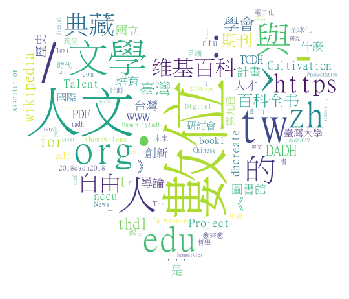

In [5]:

# NewsCloud3   文字雲結合google search

import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '數位人文'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))
#-----------------------------------------------

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "C:\\Windows\\Fonts\\mingliu.ttc"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("heart.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔